scripts for pca analysis comparing plan/no plan

In [11]:
# plan data
# load arrs, pgv4 new
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ = 'outer_loop_pg_new_v4f_test_07_12-220919.pkl'  # 'outer_loop_pg_new_v4f_ttg_26_11-115931.pkl' # 'outer_loop_pg_new_v4f_test_02_11-183526.pkl' # 'outer_loop_pg_new_v4f_02_11-010356.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135408.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135016.pkl' # 'outer_loop_pg_new_v4f_test_31_10-211852.pkl'
other = load_large_outputs(file_)

## if not test:
# (selected_other,plan_info) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = selected_other
# plan:
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = plan_info['other_']

# if test:
(r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr) = other
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'sample_arr.shape=',sample_arr.shape,'mask_arr.shape=',mask_arr.shape,'\n','pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'policy_arr.shape=',policy_arr[0].shape,'\n','hs_arr=',hs_arr.shape,'hv_arr=',hv_arr.shape)
print('r_tot=',np.mean(np.sum(r_arr,axis=1)))
print('plan_rate=',np.sum(sample_arr,axis=None)/np.sum(mask_arr,axis=None))

r_arr.shape= (1000, 60) rp_arr.shape= (1000, 60) sample_arr.shape= (1000, 60) mask_arr.shape= (1000, 60) 
 pos_plan_arr.shape= (1000, 61, 2) pos_arr.shape= (1000, 61, 2) dot_arr.shape= (1000, 61, 2) policy_arr.shape= (1000, 60, 81) 
 hs_arr= (1000, 60, 100) hv_arr= (1000, 60, 300)
r_tot= 17.528133
plan_rate= 0.10187283


In [10]:
# noplan data
# load arrs, pgv4 new 
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ = 'outer_loop_pg_new_v4f_test_07_12-220947.pkl' # 'outer_loop_pg_new_v4f_19_11-102129.pkl' # 'outer_loop_pg_new_v4f_test_02_11-183559.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135335.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135116.pkl' # 'outer_loop_pg_new_v4f_test_31_10-211936.pkl'
other = load_large_outputs(file_)
(r_arr_np,rp_arr_np,sample_arr_np,mask_arr_np,pos_plan_arr_np,pos_arr_np,dot_arr_np,policy_arr_np,hs_arr_np,hv_arr_np,vec_ind_arr_np,act_ind_arr_np) = other
sample_arr_np = jnp.zeros_like(sample_arr_np)
print('r_arr.shape=',r_arr_np.shape,'rp_arr.shape=',rp_arr_np.shape,'sample_arr.shape=',sample_arr_np.shape,'mask_arr.shape=',mask_arr_np.shape,'\n','pos_plan_arr.shape=',pos_plan_arr_np.shape,'pos_arr.shape=',pos_arr_np.shape,'dot_arr.shape=',dot_arr_np.shape,'policy_arr.shape=',policy_arr_np[0].shape,'\n','hs_arr=',hs_arr_np.shape,'hv_arr=',hv_arr_np.shape)
print('r_tot=',np.mean(np.sum(r_arr_np,axis=1)))
print('plan_rate=',np.sum(sample_arr_np,axis=None)/np.sum(mask_arr_np,axis=None))

r_arr.shape= (1000, 60) rp_arr.shape= (1000, 60) sample_arr.shape= (1000, 60) mask_arr.shape= (1000, 60) 
 pos_plan_arr.shape= (1000, 61, 2) pos_arr.shape= (1000, 61, 2) dot_arr.shape= (1000, 61, 2) policy_arr.shape= (1000, 60, 81) 
 hs_arr= (1000, 60, 100) hv_arr= (1000, 60, 300)
r_tot= 17.86784
plan_rate= 0.0


In [3]:
# PCA using SVD for plan, no plan

import numpy as np

K = 3

def pca_svd_method(data, K):
    # Reshape the data
    num_samples, T, H = data.shape
    reshaped_data = data.reshape(num_samples*T, H)
    
    # Center the data
    mean_data = np.mean(reshaped_data, axis=0)
    centered_data = reshaped_data - mean_data
    
    # Compute the SVD
    U, S, V = np.linalg.svd(centered_data, full_matrices=False)
    
    # Get the top K columns of V
    V_topK = V.T[:, :K]
    
    # Project data onto the top K PCs
    projected_data = centered_data @ V_topK
    
    # Reshape the projected data back to [1000, 60, K]
    projected_data = projected_data.reshape(num_samples, T, K)
    
    return projected_data

hs_pc_s = pca_svd_method(hs_arr, K)
hv_pc_s = pca_svd_method(hv_arr, K)

hs_pc_s_np = pca_svd_method(hs_arr_np, K)
hv_pc_s_np = pca_svd_method(hv_arr_np, K)

print(hs_pc_s.shape)  # Should print (1000, 60, 3)
print(hv_pc_s.shape)  # Should print (1000, 60, 3)

(1000, 60, 3)
(1000, 60, 3)


In [ ]:
# binned sort
%matplotlib inline

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=5)  # Assuming 4 bins
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Loop through speed bins
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_indices = np.where(mask)[0]  # Keep track of original indices
    masked_decisions = sample_arr[mask]
    masked_rewards = r_arr[mask]
    
    total_rewards = np.sum(masked_rewards, axis=1)
    planning_rates = np.mean(masked_decisions, axis=1)
    product_scores = total_rewards * planning_rates

    # Get the sorted indices in descending order
    reward_indices = np.argsort(total_rewards)[::-1]
    planning_indices = np.argsort(planning_rates)[::-1]
    product_indices = np.argsort(product_scores)[::-1]

    # Top 5 indices for rewards and planning rates
    top_reward_indices = reward_indices[:5]
    top_planning_indices = planning_indices[:50]
    top_product_indices = product_indices[:10]
    
    # Map back to original indices
    original_top_reward_indices = masked_indices[top_reward_indices]
    original_top_planning_indices = masked_indices[top_planning_indices]
    original_top_product_indices = masked_indices[top_product_indices]
    
    # Print the results
    print("top rewards for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_reward_indices):
        print(f" Index: {original_idx}, Reward: {total_rewards[top_reward_indices[idx]]:.2f}")

    print("\n top plan rates for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_planning_indices):
        print(f"Index: {original_idx}, Planning Rate: {planning_rates[top_planning_indices[idx]]:.2f}, reward: {np.sum(r_arr[original_idx,:]):.2f}")

    print("\n top Product Scores for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_product_indices):
        print(f"Index: {original_idx}, Score: {product_scores[top_product_indices[idx]]:.2f}")
    print('----------------------')

In [114]:
# full ani pgv2/3 with policy heatmap

%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.patches import Ellipse
import functools
import jax.numpy as jnp
import jax.random as rnd

def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
    index_range = jnp.arange(MODULES**2)
    x = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
    y = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
    xv,yv = jnp.meshgrid(x,y)
    A_full = jnp.vstack([xv.flatten(),yv.flatten()])

    inner_mask = (jnp.abs(xv) <= ACTION_SPACE) & (jnp.abs(yv) <= ACTION_SPACE)
    A_inner_ind = index_range[inner_mask.flatten()]
    A_outer_ind = index_range[~inner_mask.flatten()]
    A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    VEC_ARR = A_full[:,ID_ARR]
    H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    return SC #,prior_vec,zero_vec_index

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_plan_arr,pos_arr,policy_arr_vec,policy_arr_act,VEC_ARR,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L):
    
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('lightgrey')

    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    policy_dot_sizes = np.sqrt(policy_arr_vec[i,:])
    policy_color = cm.hot(colormap_norm(policy_arr_act[i,0]))

    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    policy_scatter.set_offsets(mod_(pos_plan_arr[i, :] + VEC_ARR.T))
    policy_scatter.set_sizes(POLICY_DOT_SIZE*policy_dot_sizes)
    policy_scatter.set_facecolors(policy_color)
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L]

k = 710 # 68 # 902
interval = 200 # 150
APERTURE = (1/2)*np.pi # (3/5``)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 1 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 9 #
SIGMA_SCALE = 3
POLICY_DOT_SIZE = 70 # 100

ke = rnd.split(rnd.PRNGKey(0),10)
(ID_ARR,VEC_ARR,H1VEC_ARR) = gen_sc(ke,MODULES,ACTION_SPACE,PLAN_SPACE)

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
policy_arr_vec = policy_arr[0][k,:,:]
policy_arr_act = policy_arr[1][k,:,:]

# r_arr_ = r_arr_np[k,:]
# dot_arr_ = dot_arr_np[k,:,:] # [STEPS,2]
# pos_plan_arr_ = pos_plan_arr_np[k,:,:] # [STEPS,2]
# pos_arr_ = pos_arr_np[k,:,:] # [STEPS,2]
# policy_arr_vec = policy_arr_np[0][k,:,:]
# policy_arr_act = policy_arr_np[1][k,:,:]

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
colormap_norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')

aperture_points = ax_ani.scatter([], [], color='lightgrey', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)

policy_color_init = cm.hot(colormap_norm(policy_arr_act[0,0])) # Assuming policy_arr_ corresponds to policy[1]
policy_dot_sizes_init = np.sqrt(policy_arr_vec[0, :])
policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)

L=ax_ani.legend(loc='upper right')

partial_animate = functools.partial(
    animate,
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    pos_plan_arr=pos_plan_arr_,
    pos_arr=pos_arr_, 
    policy_arr_vec=policy_arr_vec,
    policy_arr_act=policy_arr_act,
    VEC_ARR=VEC_ARR,
    dot=dot, 
    agent_plan=agent_plan,
    agent=agent, 
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    policy_scatter=policy_scatter,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_19614/2443129135.py:184: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_19614/2443129135.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_19614/2443129135.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.

NameError: name 'speed_bins' is not defined

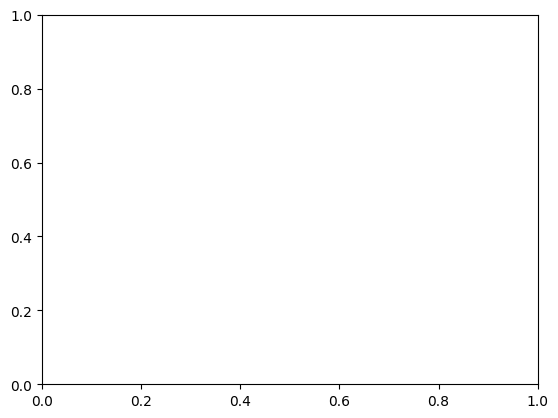

In [5]:
# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x_values = (speed_bins[1:] + speed_bins[:-1]) / 2
ax.errorbar(x_values, mean_rewards_no_plan, yerr=1.96*sem_rewards_no_plan, label="No Plan", fmt='o-', lw=1.5,  markersize=5, alpha=0.8)
ax.errorbar(x_values, mean_rewards_plan, yerr=1.96*sem_rewards_plan, label="Plan", fmt='o-', lw=1.5, markersize=5, alpha=0.8)

# ax.set_yscale("log")
ax.set_xlabel("Dot Speed")
ax.set_ylabel("Average Reward")
ax.set_title("Average Reward by Dot Speed")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

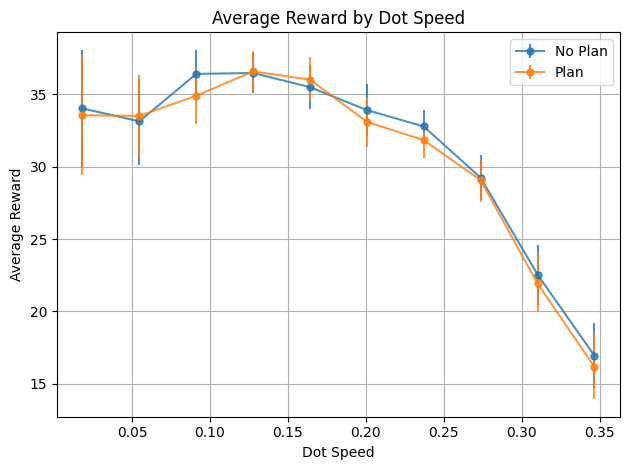

In [6]:
# reward vs speed for plan/no plan

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def compute_rewards_for_speed_bins(dot_array, reward_array, speed_bins):
    # Compute dot speeds for each trial
    dot_diffs = np.diff(dot_array, axis=1)
    dot_speeds = np.linalg.norm(dot_diffs, axis=2)
    trial_mean_dot_speeds = np.mean(dot_speeds, axis=1)

    sbins = len(speed_bins) - 1
    mean_rewards = np.zeros(sbins)
    sem_rewards = np.zeros(sbins)

    for s in range(sbins):
        mask = (trial_mean_dot_speeds >= speed_bins[s]) & (trial_mean_dot_speeds < speed_bins[s + 1])
        rewards_in_bin = reward_array[mask]
        
        if len(rewards_in_bin) > 0:
            mean_rewards[s] = np.mean(rewards_in_bin)
            sem_rewards[s] = np.std(rewards_in_bin) / np.sqrt(len(rewards_in_bin))
            
    return mean_rewards, sem_rewards

reward_arr = np.sum(r_arr, axis=1)
reward_arr_np = np.sum(r_arr_np, axis=1)

# Bin data by dot speed
sbins = 10
speed_bins = np.linspace(0, max(np.max(np.mean(np.linalg.norm(np.diff(dot_arr, axis=1), axis=2))), 
                               np.max(np.mean(np.linalg.norm(np.diff(dot_arr, axis=1), axis=2)))), 
                        num=sbins + 1)

mean_rewards_no_plan, sem_rewards_no_plan = compute_rewards_for_speed_bins(dot_arr_np, reward_arr_np, speed_bins)
mean_rewards_plan, sem_rewards_plan = compute_rewards_for_speed_bins(dot_arr, reward_arr, speed_bins)

# Plotting
fig, ax = plt.subplots()

x_values = (speed_bins[1:] + speed_bins[:-1]) / 2
ax.errorbar(x_values, mean_rewards_no_plan, yerr=1.96*sem_rewards_no_plan, label="No Plan", fmt='o-', lw=1.5,  markersize=5, alpha=0.8)
ax.errorbar(x_values, mean_rewards_plan, yerr=1.96*sem_rewards_plan, label="Plan", fmt='o-', lw=1.5, markersize=5, alpha=0.8)

# ax.set_yscale("log")
ax.set_xlabel("Dot Speed")
ax.set_ylabel("Average Reward")
ax.set_title("Average Reward by Dot Speed")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

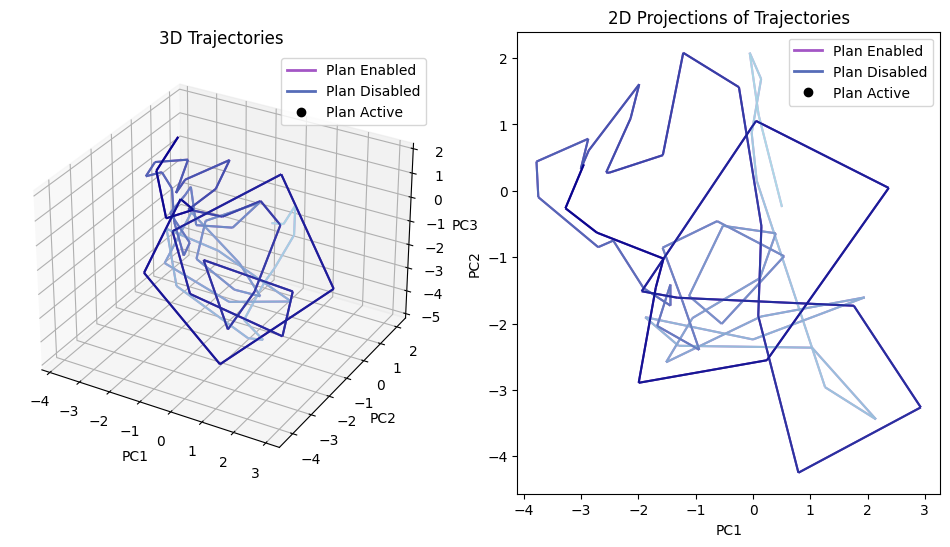

In [16]:
# compare plan/no plan trajectories for given trials, (plans in black)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']
    # labels = ['Without Plan', 'With Plan']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    
    buffer_rate = 0.05
    all_data = np.vstack((data1[:, :, :3].reshape(-1, 3), data2[:, :, :3].reshape(-1, 3)))
    min_vals = all_data.min(axis=0)
    max_vals = all_data.max(axis=0)
    ranges = max_vals - min_vals
    buffer = buffer_rate * ranges

    ax1.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
    ax1.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])
    ax1.set_zlim(min_vals[2] - buffer[2], max_vals[2] + buffer[2])
    ax2.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
    ax2.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])
    
    for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
        for idx, n in enumerate(n_list):
            traj = data[n, :, :3]
            length = traj.shape[0]

            transitions = np.where(np.diff(sample_arr[n, :]) != 0)[0]
            if sample_arr[n, 0] == 1:
                transitions = np.insert(transitions, 0, -1)
            if sample_arr[n, -1] == 1:
                transitions = np.append(transitions, length - 2)

            colors = [cmap(i / length) if sample_arr[n, i] == 0 else (0, 0, 0, 1) for i in range(length)]
            # colors = [plt.get_cmap(cmap)(i) if sample_arr[n, i] == 0 else (0, 0, 0, 1) for i in range(length)]
            segments_3d = [traj[i:i+2] for i in range(length-1)]
            segments_2d = [s[:, :2] for s in segments_3d]

            lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
            lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

            ax1.add_collection(lc_3d)
            ax2.add_collection(lc_2d)

            # Calculating limits with buffer
            min_vals = np.min(traj, axis=0)
            max_vals = np.max(traj, axis=0)
            ranges = max_vals - min_vals
            buffer = buffer_rate * ranges

            ax1.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
            ax1.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])
            ax1.set_zlim(min_vals[2] - buffer[2], max_vals[2] + buffer[2])
            
            ax2.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
            ax2.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])

            for t in transitions:
                ax1.scatter(*traj[t+1, :3], color='black', s=10)
                ax2.scatter(*traj[t+1, :2], color='black', s=10)

            if sample_arr[n, 0] == 1:
                ax1.scatter(*traj[0, :3], color='black', s=10)
                ax2.scatter(*traj[0, :2], color='black', s=10)
            if sample_arr[n, -1] == 1:
                ax1.scatter(*traj[-1, :3], color='black', s=10)
                ax2.scatter(*traj[-1, :2], color='black', s=10)

    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # ax1.legend()
    # ax2.legend()
    # plt.show()
    # Legend handling
    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()

fig = plt.figure(figsize=(12, 6))
n_list = [710] # [257]

plot_combined_trajectories(fig, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, n_list)

In [ ]:
# compare plan/no plan trajectories starting at plan (OLD)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def find_first_plan(sample_array):
    try:
        return np.where(sample_array == 1)[0][0]
    except IndexError:
        return None

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Without Plan', 'With Plan']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    
    for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
        for idx, n in enumerate(n_list):
            plan_starts = np.where(sample_arr[n] == 1)[0]

            for start in plan_starts:
                end = min(start + 11, len(sample_arr[n]))  # Ensuring we don't exceed array length
                traj = data[n, start:end, :3]
                sample_arr_sub = sample_arr[n, start:end]
                length = len(traj)

                colors = [cmap(i / length) if sample_arr_sub[i] == 0 else (0, 0, 0, 1) for i in range(length)]
                segments_3d = [traj[i:i + 2] for i in range(length - 1)]
                segments_2d = [s[:, :2] for s in segments_3d]

                lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
                lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

                ax1.add_collection(lc_3d)
                ax2.add_collection(lc_2d)

                # Plot transition points
                transitions = np.where(np.diff(sample_arr_sub) != 0)[0]
                for t in transitions:
                    ax1.scatter(*traj[t + 1, :3], color='black', s=10)
                    ax2.scatter(*traj[t + 1, :2], color='black', s=10)

    # Set axis labels and titles
    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    ax1.legend()
    ax2.legend()
    plt.show()

# Example usage
fig = plt.figure(figsize=(12, 6))
n_list = [257]  # Specify the indices of the trajectories you want to plot
plot_combined_trajectories(fig, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, n_list)


In [7]:
# compare plan/no plan trajectories starting at plan

%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

def find_first_plan(sample_array):
    try:
        return np.where(sample_array == 1)[0][0]
    except IndexError:
        return None

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list, len_after_plan):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    for idx, n in enumerate(n_list):
        plan_starts = np.where(sample_arr1[n] == 1)[0]
        if len(plan_starts) == 0:
            continue  # Skip if there are no planning phases

        max_length = len(sample_arr1[n])  # Full length of the trajectory

        for start in plan_starts:
            end = min(start + len_after_plan + 1, max_length)  # Ensuring we don't exceed array length

            for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
                # Aligning segments from both datasets
                traj = data[n, start:end, :3]
                sample_arr_sub = sample_arr[n, start:end]
                length = len(traj)

                # Use original indices for color mapping
                colors = [cmap((start + i) / max_length) if sample_arr_sub[i] == 0 else (0, 0, 0, 1) for i in range(length)]
                segments_3d = [traj[i:i + 2] for i in range(length - 1)]
                segments_2d = [s[:, :2] for s in segments_3d]

                lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
                lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

                ax1.add_collection3d(lc_3d)
                ax2.add_collection(lc_2d)

                # New logic for finding and plotting plan start/end points
                plan_indices = np.where(np.diff(sample_arr_sub) != 0)[0]
                if sample_arr_sub[0] == 1:
                    plan_indices = np.insert(plan_indices, 0, -1)
                if sample_arr_sub[-1] == 1:
                    plan_indices = np.append(plan_indices, len(sample_arr_sub) - 1)

                for i in range(0, len(plan_indices), 2):
                    start_plan = plan_indices[i] + 1  # Start of the plan
                    end_plan = plan_indices[i + 1] + 1 if i + 1 < len(plan_indices) else len(traj) - 1  # End of the plan
                    ax1.scatter(*traj[start_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[start_plan, :2], color='black', s=10)
                    ax1.scatter(*traj[end_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[end_plan, :2], color='black', s=10)

    # Set axis labels and titles
    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Legend handling
    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()

# Example usage
fig = plt.figure(figsize=(12, 6))
n_list = [710] # [257]
len_after_plan = 5
sample_arr_ = np.array(sample_arr)
sample_arr_np_ = np.array(sample_arr_np)
hs_pc_s_ = np.array(hs_pc_s)
hs_pc_s_np_ = np.array(hs_pc_s_np)
hv_pc_s_ = np.array(hv_pc_s)
hv_pc_s_np_ = np.array(hv_pc_s_np)

plot_combined_trajectories(fig, hs_pc_s_, sample_arr_, hs_pc_s_np_, sample_arr_np_, n_list, len_after_plan)

In [ ]:
# state space for planning (blue) vs not planning (pink) (OLD)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_combined_trajectories_with_averages(fig, data1, data2, n_list):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"], N=256)
    pink_cmap = LinearSegmentedColormap.from_list("custom_pink", ["#ffc0cb", "#ff69b4"], N=256)
    alpha_value = 0.1  # Adjust alpha for low-opacity spheres

    ax = fig.add_subplot(121, projection='3d')

    for n in n_list:
        # Plot planning states (data1)
        data_plan = data1[n, :, :3]
        ax.scatter(data_plan[:, 0], data_plan[:, 1], data_plan[:, 2], color="blue", alpha=alpha_value)
        mean_plan = np.mean(data_plan, axis=0)
        ax.scatter(mean_plan[0], mean_plan[1], mean_plan[2], color="blue", edgecolor="black", s=50, label='Mean Planning State' if n == n_list[0] else "")

        # Plot no planning states (data2)
        data_no_plan = data2[n, :, :3]
        ax.scatter(data_no_plan[:, 0], data_no_plan[:, 1], data_no_plan[:, 2], color="pink", alpha=alpha_value)
        mean_no_plan = np.mean(data_no_plan, axis=0)
        ax.scatter(mean_no_plan[0], mean_no_plan[1], mean_no_plan[2], color="pink", edgecolor="black", s=50, label='Mean No-Planning State' if n == n_list[0] else "")

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Hidden State Space with Average Locations')

    # Adding legend
    ax.legend()

    plt.show()

# Example usage
fig = plt.figure(figsize=(12, 6))
n_list = [257]  # Replace with your indices

plot_combined_trajectories_with_averages(fig, hs_pc_s_, hs_pc_s_np_, n_list)


In [34]:
### state space for plan (blue) vs no plan (pink)

%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def measure_space_spanned(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    return max_vals - min_vals

def calculate_overlap(data1, data2):
    max_min = np.maximum(np.min(data1, axis=0), np.min(data2, axis=0))
    min_max = np.minimum(np.max(data1, axis=0), np.max(data2, axis=0))
    overlap = np.maximum(0, min_max - max_min)
    return np.prod(overlap)

def plot_states_and_measure_overlap(data1, data2, sample_arr, alpha, dot_size):
    fig = plt.figure(figsize=(4, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Filter 'plan' states for plotting in black
    plan_states = data1[sample_arr == 1]

    # Plot data points
    # ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], color="pink", alpha=alpha, s=dot_size, edgecolors='none')
    ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], color="blue", alpha=alpha, s=dot_size, edgecolors='none')
    ax.scatter(plan_states[:, 0], plan_states[:, 1], plan_states[:, 2], color="black", alpha=2*alpha, s=dot_size, edgecolors='none')

    # Measure space spanned
    span_plan = measure_space_spanned(data1)
    span_no_plan = measure_space_spanned(data2)

    # Calculate Overlap
    overlap_vol = calculate_overlap(data1, data2)

    # Set labels and title
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_title('State Space of Plan Enabled/Disabled Hidden States')

    ax.set_xlabel('PC1', fontsize=fnt, labelpad=-5, rotation=0)
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    # ax1.xaxis.pane.fill = False
    ax.set_ylabel('PC2', fontsize=fnt, labelpad=-0, rotation=0)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.set_zlabel('PC3', fontsize=fnt, labelpad=-10, rotation=90)
    ax.set_zticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.grid(False)

    # ax.legend(loc="upper center", ncol=1, fontsize=15, frameon=False, handlelength=1.4, columnspacing=0.5, bbox_to_anchor=(0.1, .9))

    # Legend handling
    custom_lines = [
        # Line2D([0], [0], color='purple', lw=2),
                    Line2D([0], [0], color='blue', lw=2),
                    Line2D([0], [0], color='black', lw=2)]
    ax.legend(custom_lines, ['move', 'plan'], loc="upper center", ncol=3, fontsize=14, frameon=False, handlelength=1.4, columnspacing=0.8, bbox_to_anchor=(0.5, .95))

    plt.show()

# print(f"Space Spanned by Planning States: {span_plan}")
# print(f"Space Spanned by No-Planning States: {span_no_plan}")
# print(f"Volume of Overlapping Space: {overlap_vol}")

fnt = 18
alpha = 0.08
dot_size = 15
# plot_states_and_measure_overlap(hs_pc_s_, hs_pc_s_np_, sample_arr_, alpha, dot_size)
plot_states_and_measure_overlap(hv_pc_s_, hv_pc_s_np_, sample_arr_, alpha, dot_size)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
# scatter plot plan hidden states binned by dot speed (OLD)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define planning per trial (assuming planning occurs at least once in a trial to be considered a planning trial)
planning_per_trial = np.any(sample_arr == 1, axis=1)

def plot_planning_states_by_speed(hs_pc_s_, planning_per_trial, mean_dot_speeds, speed_bins):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['red', 'green', 'blue', 'purple']  # Adjust colors as needed

    # Plot planning states for each speed bin
    for i in range(len(speed_bins) - 1):
        # Selecting trials in the current speed bin
        in_bin = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i+1])
        
        # Select corresponding planning states
        plan_states = hs_pc_s_[planning_per_trial & in_bin]

        # Plot
        ax.scatter(plan_states[:, 0], plan_states[:, 1], plan_states[:, 2], color=colors[i], alpha=0.1, s=100, label=f'Speed Bin {i+1}')

    # Set labels and title
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Planning States by Dot Speed')

    # Adding legend
    ax.legend()

    plt.show()

# Define speed bins
sbins = 3
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)  # 4 bins

plot_planning_states_by_speed(hs_pc_s_, planning_per_trial, mean_dot_speeds, speed_bins)


In [25]:
# scatter plot plan hidden states binned by dot speed

%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def compute_dot_speed(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    speed = np.linalg.norm(dot_diffs, axis=2)
    mean_speed = np.mean(speed, axis=1)
    return mean_speed

def generate_speed_bins(N, speeds):
    min_speed, max_speed = np.min(speeds), np.max(speeds)
    bins = np.linspace(min_speed, max_speed, N + 1)
    return bins

def plot_plan_states_by_speed(hs_pc_s, sample_arr, dot_arr, N, alpha, dot_size):
    # Compute mean speed per trial
    speeds = compute_dot_speed(dot_arr)
    speed_bins = generate_speed_bins(N, speeds)

    # Prepare plot with subplots for 3D and 2D
    fig = plt.figure(figsize=(24, 6))
    ax_3d = fig.add_subplot(121, projection='3d')  # 3D plot
    ax_2d = fig.add_subplot(122)                   # 2D plot
    # color_wheel = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    color_wheel = plt.cm.seismic(np.linspace(0, 1, N ))

    # Scatter plot for each speed bin in both 3D and 2D
    for i in range(N):
        # Find trials with speeds within the current bin
        selected_trials = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
        
        for trial in range(len(selected_trials)):
            if selected_trials[trial]:
                # For each selected trial, filter for 'plan' states and plot
                plan_states = hs_pc_s[trial][sample_arr[trial] == 1]
                ax_3d.scatter(plan_states[:, 0], plan_states[:, 1], plan_states[:, 2], 
                              color=color_wheel[i], alpha=alpha, s=dot_size, edgecolors='none')
                ax_2d.scatter(plan_states[:, 1], plan_states[:, 2], 
                              color=color_wheel[i], alpha=alpha, s=dot_size, edgecolors='none')

    # Create legends for speed bins
    bin_labels = [f"Speed Bin {i}" for i in range(N)]
    legend_elements = [Line2D([0], [0], marker='o', color=color_wheel[i], lw=0, 
                              label=bin_labels[i], markersize=np.sqrt(dot_size), 
                              markerfacecolor=color_wheel[i], alpha=alpha) for i in range(N)]

    ax_3d.legend(handles=legend_elements, loc="upper right")
    ax_2d.legend(handles=legend_elements, loc="upper right")

    # Setting labels and titles
    ax_3d.set_xlabel('PC1')
    ax_3d.set_ylabel('PC2')
    ax_3d.set_zlabel('PC3')
    ax_3d.set_title('3D Plot of Plan States by Dot Speed')

    ax_2d.set_xlabel('PC2')
    ax_2d.set_ylabel('PC3')
    ax_2d.set_title('2D Plot of Plan States by Dot Speed')

    plt.show()

# Assuming hs_pc_s_, sample_arr_, and dot_arr_ are defined
hs_pc_s_ = np.array(hs_pc_s)
sample_arr_ = np.array(sample_arr)
dot_arr_ = np.array(dot_arr)

alpha = 0.3
dot_size = 40
N = 4  # Number of speed bins
plot_plan_states_by_speed(hs_pc_s_, sample_arr_, dot_arr_, N, alpha, dot_size)
# plot_plan_states_by_speed(hv_pc_s_, sample_arr_, dot_arr_, N, alpha, dot_size)


In [24]:
# scatter plot plan hidden states binned by dot direction

%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_speed_bins(N, speeds):
    min_speed, max_speed = np.min(speeds), np.max(speeds)
    bins = np.linspace(min_speed, max_speed, N + 1)
    return bins

def generate_bin_vectors(N):
    angles = np.linspace(0, 2 * np.pi, N+1)[:-1]  # Avoiding overlap with 0
    return np.column_stack((np.cos(angles), np.sin(angles)))

def generate_polar_angles(N):
    step = 360 / N
    angles = [(i * step) % 360 for i in range(N)]
    return [f"{int(angle)}°" if angle <= 180 else f"{int(angle - 360)}°" for angle in angles]

def compute_dot_direction(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    mean_dot_dir = np.mean(dot_diffs, axis=1)
    norm_dot_dir = np.linalg.norm(mean_dot_dir, axis=1)
    mean_dot_dir_normalized = mean_dot_dir / norm_dot_dir[:, np.newaxis]
    return mean_dot_dir_normalized

def plot_plan_states_by_direction(hs_pc_s, sample_arr, dot_arr, N, alpha, dot_size):
    # Compute normalized dot directions
    normalized_dot_dirs = compute_dot_direction(dot_arr)
    bins = generate_bin_vectors(N)
    
    # Prepare plot with subplots for 3D and 2D
    fig = plt.figure(figsize=(24, 6))
    ax_3d = fig.add_subplot(121, projection='3d')  # 3D plot
    ax_2d = fig.add_subplot(122)                   # 2D plot
    color_wheel = plt.cm.hsv(np.linspace(0, 1, N + 1))

    # Scatter plot for each bin in both 3D and 2D
    for i, bin_dir in enumerate(bins):
        # Find trials with dot directions closest to the bin direction
        cosine_similarity = normalized_dot_dirs @ bin_dir
        selected_trials = cosine_similarity > np.cos(np.pi / N)

        for trial in range(len(selected_trials)):
            if selected_trials[trial]:
                # For each selected trial, filter for 'plan' states and plot
                plan_states = hs_pc_s[trial][sample_arr[trial] == 1]
                ax_3d.scatter(plan_states[:, 0], plan_states[:, 1], plan_states[:, 2], 
                              color=color_wheel[i], alpha=alpha, s=dot_size, edgecolors='none')
                ax_2d.scatter(plan_states[:, 1], plan_states[:, 2], 
                              color=color_wheel[i], alpha=alpha, s=dot_size, edgecolors='none')

    # Legend and labeling for both plots
    polar_angles = generate_polar_angles(N)
    legend_elements = [Line2D([0], [0], marker='o', color=color_wheel[i], lw=0, 
                              label=polar_angles[i], markersize=np.sqrt(dot_size), 
                              markerfacecolor=color_wheel[i], alpha=alpha) for i in range(N)]

    ax_3d.legend(handles=legend_elements, loc="upper right")
    ax_2d.legend(handles=legend_elements, loc="upper right")

    # Setting labels and titles
    ax_3d.set_xlabel('PC1')
    ax_3d.set_ylabel('PC2')
    ax_3d.set_zlabel('PC3')
    ax_3d.set_title('3D Plot of Plan States by Dot Direction')

    ax_2d.set_xlabel('PC2')
    ax_2d.set_ylabel('PC3')
    ax_2d.set_title('2D Plot of Plan States by Dot Direction')

    plt.show()

dot_arr_ = np.array(dot_arr)
sample_arr_ = np.array(sample_arr)
alpha = 0.3
dot_size = 40

N = 8  # Number of direction bins
plot_plan_states_by_direction(hs_pc_s_, sample_arr_, dot_arr_, N, alpha, dot_size)
# plot_plan_states_by_direction(hv_pc_s_, sample_arr_, dot_arr_, N, alpha, dot_size)


In [14]:
# plan / no plan trajectories binned by dot speed and direction (OLD)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Functions compute_dot_speed, compute_dot_direction, and generate_bin_vectors as defined previously

def compute_dot_speed(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    speed = np.linalg.norm(dot_diffs, axis=2)
    mean_speed = np.mean(speed, axis=1)
    return mean_speed

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_full_trajectory_sub_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, alpha):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    # Function to plot trajectory segments
    def plot_trajectory_segments(trial_data, cmap, label, include_plan_lines=False):
        num_points = len(trial_data)
        for i in range(num_points - 1):
            start, end = trial_data[i], trial_data[i + 1]
            segment = np.array([start, end])
            color = cmap((i + 1) / num_points)  # Getting progressively darker color
            ax.plot(segment[:, 0], segment[:, 1], segment[:, 2], 
                    '-', color=color, alpha=alpha, linewidth=2, label=label if i == 0 else "")

            # Highlighting planning initiation points
            if include_plan_lines and (i == 0 or not sample_arr[trial_idx][i - 1]):
                ax.plot(segment[:, 0], segment[:, 1], segment[:, 2], 'k-', linewidth=2)

    # Plot each trial in selected trials
    for trial_idx in selected_trials:
        # Plot "no plan" trajectory segments
        no_plan_data = hs_pc_s_np[trial_idx]
        plot_trajectory_segments(no_plan_data, blue_cmap, labels[1])

        # Plot "plan" trajectory segments
        if trial_idx < len(hs_pc_s):  # Check if there's corresponding plan data
            plan_data = hs_pc_s[trial_idx]
            plot_trajectory_segments(plan_data, purple_cmap, labels[0], include_plan_lines=True)

    # Create a custom legend
    custom_lines = [plt.Line2D([0], [0], color=blue_cmap(1.), lw=4),
                    plt.Line2D([0], [0], color=purple_cmap(1.), lw=4)]
    ax.legend(custom_lines, labels)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Trajectories for Speed Bin {sbin} and Direction Bin {dbin}')
    plt.show()


# Use the function with sample data
sbins = 3  # Number of speed bins
dbins = 8  # Number of direction bins
sbin = 1   # Speed bin index
dbin = 3   # Direction bin index
alpha = 0.1

hs_pc_s_ = np.array(hs_pc_s)
hs_pc_s_np_ = np.array(hs_pc_s_np)
sample_arr_ = np.array(sample_arr)
dot_arr_ = np.array(dot_arr)

plot_full_trajectory_sub_bin(hs_pc_s_, hs_pc_s_np_, sample_arr_, dot_arr_, sbins, dbins, sbin, dbin, alpha)


In [ ]:
# plan / no plan trajectories binned by dot speed and direction (OLD)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Functions compute_dot_speed, compute_dot_direction, and generate_bin_vectors as defined previously

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, alpha):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    all_data = []
    for trial_idx in selected_trials:
        for data, cmap in [(hs_pc_s_np[trial_idx], blue_cmap), 
                           (hs_pc_s[trial_idx], purple_cmap) if trial_idx < len(hs_pc_s) else (None, None)]:
            if data is not None:
                traj = data[:, :3]
                length = traj.shape[0]
                colors = [cmap(i / length) for i in range(length)]
                segments_3d = [traj[i:i+2] for i in range(length - 1)]
                segments_2d = [s[:, :2] for s in segments_3d]
                lc_3d = Line3DCollection(segments_3d, colors=colors[:-1])
                lc_2d = LineCollection(segments_2d, colors=colors[:-1])
                ax1.add_collection3d(lc_3d)
                ax2.add_collection(lc_2d)
                all_data.append(traj)

    all_data = np.vstack(all_data)
    min_vals = np.min(all_data, axis=0)
    max_vals = np.max(all_data, axis=0)
    buffer = np.ptp(all_data, axis=0) * 0.1

    ax1.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
    ax1.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])
    ax1.set_zlim(min_vals[2] - buffer[2], max_vals[2] + buffer[2])
    ax2.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
    ax2.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])

    ax1.set_title('3D Trajectories in Bin')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections in Bin')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    plt.show()

# Using the function with the specified bins
sbins = 4
dbins = 8
sbin = 2 # from 0
dbin = 3 # from 0
alpha = 0.1
plot_trajectories_in_bin(hs_pc_s_, hs_pc_s_np_, sample_arr_, dot_arr_, sbins, dbins, sbin, dbin, alpha)

In [ ]:
# plan / no plan trajectories binned by dot speed and direction (OLD)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Functions compute_dot_speed, compute_dot_direction, and generate_bin_vectors as defined previously

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, alpha):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    # Adjusted the shade of purple as per your requirement
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    for trial_idx in selected_trials:
        # Handling for hs_pc_s_np data (No Plan)
        plot_trajectory_with_transitions(ax1, ax2, hs_pc_s_np[trial_idx], sample_arr[trial_idx], blue_cmap)

        # Handling for hs_pc_s data (Plan) if the trial index is valid
        if trial_idx < len(hs_pc_s):
            plot_trajectory_with_transitions(ax1, ax2, hs_pc_s[trial_idx], sample_arr[trial_idx], purple_cmap)

    ax1.set_title(f'3D Trajectories in Bin (Speed Bin: {sbin}, Direction Bin: {dbin})')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    ax2.set_title(f'2D Projections in Bin (Speed Bin: {sbin}, Direction Bin: {dbin})')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Add legends
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    plt.show()

def plot_trajectory_with_transitions(ax1, ax2, data, sample_arr_data, cmap):
    traj = data[:, :3]
    length = traj.shape[0]

    transitions = np.where(np.diff(sample_arr_data) != 0)[0]
    if sample_arr_data[0] == 1:
        transitions = np.insert(transitions, 0, -1)
    if sample_arr_data[-1] == 1:
        transitions = np.append(transitions, length - 2)

    colors = [cmap(i / length) if sample_arr_data[i] == 0 else (0, 0, 0, 1) for i in range(length)]
    segments_3d = [traj[i:i+2] for i in range(length - 1)]
    segments_2d = [s[:, :2] for s in segments_3d]

    lc_3d = Line3DCollection(segments_3d, colors=colors[:-1])
    lc_2d = LineCollection(segments_2d, colors=colors[:-1])

    ax1.add_collection3d(lc_3d)
    ax2.add_collection(lc_2d)

    for t in transitions:
        ax1.scatter(*traj[t+1, :3], color='black', s=10)
        ax2.scatter(*traj[t+1, :2], color='black', s=10)

    if sample_arr_data[0] == 1:
        ax1.scatter(*traj[0, :3], color='black', s=10)
        ax2.scatter(*traj[0, :2], color='black', s=10)
    if sample_arr_data[-1] == 1:
        ax1.scatter(*traj[-1, :3], color='black', s=10)
        ax2.scatter(*traj[-1, :2], color='black', s=10)

# Using the function with the specified bins
sbins = 4
dbins = 8
sbin = 2 # from 0
dbin = 3 # from 0
alpha = 0.1
plot_trajectories_in_bin(hs_pc_s_, hs_pc_s_np_, sample_arr_, dot_arr_, sbins, dbins, sbin, dbin, alpha)


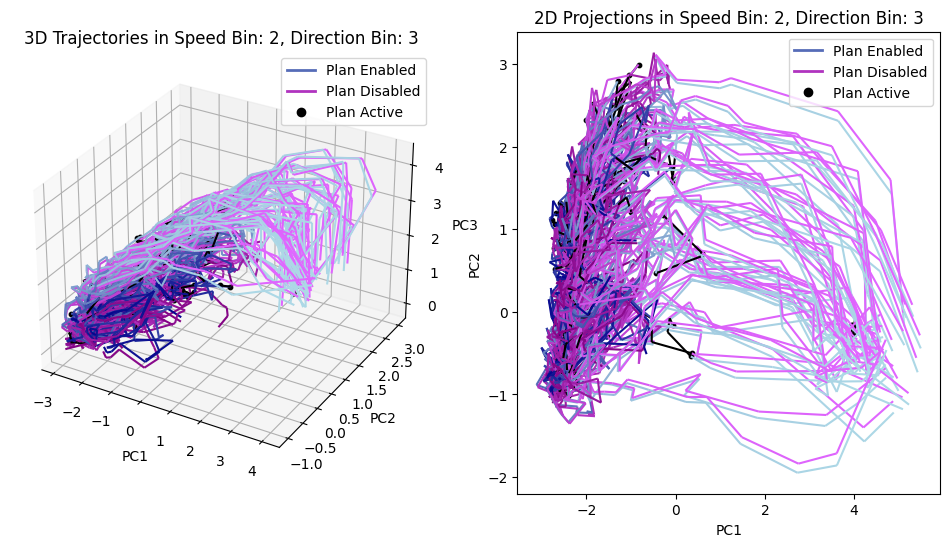

In [7]:
# plan / no plan trajectories binned by dot speed and direction (single bin, black line...)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D

def generate_speed_bins(N, speeds):
    min_speed, max_speed = np.min(speeds), np.max(speeds)
    bins = np.linspace(min_speed, max_speed, N + 1)
    return bins

def compute_dot_speed(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    speed = np.linalg.norm(dot_diffs, axis=2)
    mean_speed = np.mean(speed, axis=1)
    return mean_speed

def generate_bin_vectors(N):
    angles = np.linspace(0, 2 * np.pi, N+1)[:-1]  # Avoiding overlap with 0
    return np.column_stack((np.cos(angles), np.sin(angles)))

def generate_polar_angles(N):
    step = 360 / N
    angles = [(i * step) % 360 for i in range(N)]
    return [f"{int(angle)}°" if angle <= 180 else f"{int(angle - 360)}°" for angle in angles]

def compute_dot_direction(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    mean_dot_dir = np.mean(dot_diffs, axis=1)
    norm_dot_dir = np.linalg.norm(mean_dot_dir, axis=1)
    mean_dot_dir_normalized = mean_dot_dir / norm_dot_dir[:, np.newaxis]
    return mean_dot_dir_normalized

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, alpha):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    for trial_idx in selected_trials:
        # hs_pc_s_np
        plot_trajectory_with_transitions(ax1, ax2, hs_pc_s_np[trial_idx], sample_arr[trial_idx], blue_cmap, "No Plan")

        # hs_pc_s, if valid
        if trial_idx < len(hs_pc_s):
            plot_trajectory_with_transitions(ax1, ax2, hs_pc_s[trial_idx], sample_arr[trial_idx], purple_cmap, "Plan")

    ax1.set_title(f'3D Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    ax2.set_title(f'2D Projections in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # ax1.legend(loc='upper right')
    # ax2.legend(loc='upper right')

    # Legend handling
    custom_lines = [Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()

def plot_trajectory_with_transitions(ax1, ax2, data, sample_arr_data, cmap, label):
    traj = data[:, :3]
    length = traj.shape[0]

    transitions = np.where(np.diff(sample_arr_data) != 0)[0]
    if sample_arr_data[0] == 1:
        transitions = np.insert(transitions, 0, -1)
    if sample_arr_data[-1] == 1:
        transitions = np.append(transitions, length - 2)

    colors = [cmap(i / length) if sample_arr_data[i] == 0 else (0, 0, 0, 1) for i in range(length)]
    segments_3d = [traj[i:i+2] for i in range(length - 1)]
    segments_2d = [s[:, :2] for s in segments_3d]

    lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label)
    lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label)

    ax1.add_collection3d(lc_3d)
    ax2.add_collection(lc_2d)

    for t in transitions:
        ax1.scatter(*traj[t+1, :3], color='black', s=10)
        ax2.scatter(*traj[t+1, :2], color='black', s=10)

    if sample_arr_data[0] == 1:
        ax1.scatter(*traj[0, :3], color='black', s=10)
        ax2.scatter(*traj[0, :2], color='black', s=10)
    if sample_arr_data[-1] == 1:
        ax1.scatter(*traj[-1, :3], color='black', s=10)
        ax2.scatter(*traj[-1, :2], color='black', s=10)

sbins = 4
dbins = 8
sbin = 2
dbin = 3
alpha = 0.1
plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, alpha)


In [ ]:
# average plan/no plan/planning trajectories, binned by dot speed and direction (OLD)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_avg_traj(ax, data, cmap, label, is_3d=False):
    length = data.shape[0]
    colors = [cmap(i / (length - 1)) for i in range(length - 1)]

    if is_3d:
        for segment in segments:
            ax.plot3D(*segment.T, color=cmap(i / (length - 1)))
        # segments = [data[i:i + 2] for i in range(length - 1)]
        # lc = Line3DCollection(segments, colors=colors, label=label)
        # ax.add_collection3d(lc)
    else:
        segments = [data[i:i + 2, :2] for i in range(length - 1)]  # Use only the first two columns for 2D data
        lc = LineCollection(segments, colors=colors, label=label)
        ax.add_collection(lc)

# Function to plot average trajectory
# def plot_avg_traj(ax, data, cmap, label):
#     length = len(data)
#     colors = [cmap(i / length) for i in range(length)]
#     segments = [data[i:i+2] for i in range(length - 1)]
#     lc = LineCollection(segments, colors=colors, label=label)
#     ax.add_collection(lc)

def compute_avg_plan_locs(hs_pc_s, sample_arr):
    """
    Compute the average planning locations in the high-dimensional space.

    :param hs_pc_s: Numpy array of shape (num_trials, num_steps, num_features)
                    representing the state in high-dimensional space for each trial.
    :param sample_arr: Numpy array of shape (num_trials, num_steps) indicating
                       whether a plan is active (1) or not (0) at each time step for each trial.
    :return: Numpy array of shape (num_steps, num_features) representing the
             average location for times when a plan is active.
    """

    num_trials, num_steps, num_features = hs_pc_s.shape
    plan_locs = np.full((num_steps, num_features), np.nan)
    plan_counts = np.zeros(num_steps)
    
    for trial in range(num_trials):
        for timestep in range(num_steps):
            if sample_arr[trial, timestep] == 1:
                if np.isnan(plan_locs[timestep]).all():  # if first entry, replace NaNs
                    plan_locs[timestep] = hs_pc_s[trial, timestep]
                else:
                    plan_locs[timestep] += hs_pc_s[trial, timestep]
                plan_counts[timestep] += 1

    # Averaging
    for timestep in range(num_steps):
        if plan_counts[timestep] > 0:
            plan_locs[timestep] /= plan_counts[timestep]

    return plan_locs

def plot_average_trajectories(hs_pc_s, hs_pc_s_np, plan_locs, sample_arr, sbins, dbins, sbin, dbin):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    pink_cmap = LinearSegmentedColormap.from_list("custom_pink", ["#ff66cc", "#cc0099"])
    grey_cmap = LinearSegmentedColormap.from_list("custom_grey", ["#c0c0c0", "#404040"])

    # Compute average trajectories
    # avg_no_plan = np.mean([hs_pc_s_np[trial] for trial in selected_trials if trial < len(hs_pc_s_np)], axis=0)
    # avg_plan = np.mean([hs_pc_s[trial] for trial in selected_trials if trial < len(hs_pc_s)], axis=0)
    # avg_plan_locs = np.mean(plan_locs[selected_trials], axis=0)

    valid_trials = [trial for trial in selected_trials if trial < len(plan_locs)]
    avg_no_plan = np.mean([hs_pc_s_np[trial] for trial in valid_trials if trial < len(hs_pc_s_np)], axis=0)
    avg_plan = np.mean([hs_pc_s[trial] for trial in valid_trials if trial < len(hs_pc_s)], axis=0)
    avg_plan_locs = np.mean(plan_locs[valid_trials], axis=0)

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)


    # Plot each average trajectory
    plot_avg_traj(ax1, avg_no_plan[:, :3], blue_cmap, "Average No Plan", is_3d=True)
    plot_avg_traj(ax2, avg_no_plan[:, :2], blue_cmap, "Average No Plan", is_3d=False)
    
    plot_avg_traj(ax1, avg_plan[:, :3], pink_cmap, "Average Plan")
    plot_avg_traj(ax2, avg_plan[:, :2], pink_cmap, "")

    # Plot Plan Locations
    # Discontinuous segments are plotted individually
    for i in range(avg_plan_locs.shape[0] - 1):
        if not np.any(np.isnan(avg_plan_locs[i:i+2])):
            plot_avg_traj(ax1, avg_plan_locs[i:i+2, :3], grey_cmap, "Plan Locations" if i == 0 else "")
            plot_avg_traj(ax2, avg_plan_locs[i:i+2, :2], grey_cmap, "")

    ax1.set_title(f'3D Average Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    ax2.set_title(f'2D Average Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    plt.show()

sbins = 4
dbins = 8
sbin = 2
dbin = 3
plan_locs = compute_avg_plan_locs(hs_pc_s_, sample_arr_)
plot_average_trajectories(hs_pc_s_, hs_pc_s_np_, plan_locs, sample_arr_, sbins, dbins, sbin, dbin)

In [12]:
# plan / no plan trajectories binned by dot speed and direction (OLD)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

%matplotlib qt

def average_trajectory(trajectories):
    # Check if the list is empty
    if not trajectories:
        print("No trajectories to average.")
        return None

    # Ensure all trajectories are of the same length
    min_length = min(map(len, trajectories))
    truncated = [traj[:min_length, :] for traj in trajectories]
    return np.mean(np.array(truncated), axis=0)

def plot_trajectory(ax1, ax2, data, cmap, label, alpha=1.0):
    if data is None:
        print(f"No data provided for {label}.")
        return

    traj = data[:, :3]
    length = traj.shape[0]

    colors = [cmap(i / length, alpha=alpha) for i in range(length)]
    segments_3d = [traj[i:i + 2] for i in range(length - 1)]
    segments_2d = [s[:, :2] for s in segments_3d]

    lc_3d = Line3DCollection(segments_3d, colors=colors, label=label)
    lc_2d = LineCollection(segments_2d, colors=colors, label=label)

    ax1.add_collection3d(lc_3d)
    ax2.add_collection(lc_2d)

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    if len(selected_trials) == 0:
        print(f"No selected trials in bin: Speed {sbin}, Direction {dbin}")
        return

    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    # Aggregate trajectories for averaging
    plan_trajectories = [hs_pc_s[trial_idx] for trial_idx in selected_trials if trial_idx < len(hs_pc_s)]
    no_plan_trajectories = [hs_pc_s_np[trial_idx] for trial_idx in selected_trials]

    # Plotting average trajectories
    avg_plan_trajectory = average_trajectory(plan_trajectories)
    avg_no_plan_trajectory = average_trajectory(no_plan_trajectories)

    plot_trajectory(ax1, ax2, avg_plan_trajectory, purple_cmap, "Avg Plan")
    plot_trajectory(ax1, ax2, avg_no_plan_trajectory, blue_cmap, "Avg No Plan")

    ax1.set_title(f'3D Average Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    ax2.set_title(f'2D Average Projections in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2)]
    ax1.legend(custom_lines, ['Avg Plan', 'Avg No Plan'])
    ax2.legend(custom_lines, ['Avg Plan', 'Avg No Plan'])

    plt.show()

# Example usage (make sure hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin are defined)
sbins = 4
dbins = 8
sbin = 2
dbin = 3
plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin)


In [27]:
# plan / no plan trajectories for a given dot speed/direction bin (single bin, avg traj, black line...)
# (change: correct plan state traj; only grey dots on plan state traj; grey colormap; title to have angle; new script with plots for all bins...)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection

%matplotlib qt

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    # Check if selected_trials is empty
    if len(selected_trials) == 0:
        print(f"No selected trials in bin: Speed {sbin}, Direction {dbin}")
        return

    # Average the trajectories
    avg_traj_np = np.mean(hs_pc_s_np[selected_trials], axis=0)
    avg_traj_s = np.mean([hs_pc_s[trial] for trial in selected_trials if trial < len(hs_pc_s)], axis=0)

    # Determine the maximum number of steps in any trajectory
    max_steps = max(len(traj) for traj in hs_pc_s)

    # Initialize an array to hold the average planning states at each step
    avg_plan_states = np.zeros((max_steps, hs_pc_s[0].shape[1]))
    count_plans = np.zeros(max_steps)

    # Loop over each trajectory
    for trial in selected_trials:
        if trial < len(hs_pc_s):
            for step in range(len(hs_pc_s[trial])):
                # Check if this step is a planning step
                if sample_arr[trial][step]:
                    avg_plan_states[step] += hs_pc_s[trial][step]
                    count_plans[step] += 1

    # Normalize to get the average, only for steps where planning occurred
    for step in range(max_steps):
        if count_plans[step] > 0:
            avg_plan_states[step] /= count_plans[step]
        else:
            avg_plan_states[step] = np.array([np.nan] * hs_pc_s[0].shape[1])  # Set to NaN for non-planning steps

    # Filter out the steps with NaN (where no planning occurred)
    avg_plan_states = avg_plan_states[~np.isnan(avg_plan_states).any(axis=1)]

    # Colors
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    gray_color = "#808080"

    # Set up plot
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    # Plotting average trajectories
    plot_trajectory(ax1, ax2, avg_traj_np, blue_cmap(0.5), "No Plan Average", gray_color)
    plot_trajectory(ax1, ax2, avg_traj_s, purple_cmap(0.5), "Plan Average", gray_color)

    # Plotting average planning states
    if avg_plan_states.size > 0:  # Check if there are any planning states to plot
        # Find discontinuities (steps where planning didn't occur) and split the avg_plan_states
        discontinuities = np.where(np.isnan(avg_plan_states).any(axis=1))[0]
        start_idx = 0
        for end_idx in discontinuities:
            if end_idx > start_idx:
                plot_trajectory(ax1, ax2, avg_plan_states[start_idx:end_idx], 'black', "Plan States Average", gray_color)
            start_idx = end_idx + 1
        # Plot the last segment if it's not empty
        if start_idx < len(avg_plan_states):
            plot_trajectory(ax1, ax2, avg_plan_states[start_idx:], 'black', "Plan States Average", gray_color)

    # Calculate the axis limits
    all_data = np.concatenate([avg_traj_np, avg_traj_s, avg_plan_states])
    min_vals = np.nanmin(all_data, axis=0)
    max_vals = np.nanmax(all_data, axis=0)

    # Set the axis limits
    ax1.set_xlim([min_vals[0], max_vals[0]])
    ax1.set_ylim([min_vals[1], max_vals[1]])
    ax1.set_zlim([min_vals[2], max_vals[2]])
    ax2.set_xlim([min_vals[0], max_vals[0]])
    ax2.set_ylim([min_vals[1], max_vals[1]])

    # Set labels and titles
    ax1.set_title(f'3D Average Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title(f'2D Average Projections in Speed Bin: {sbin}, Direction Bin: {dbin}')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Create legend
    custom_lines = [
        Line2D([0], [0], color=blue_cmap(0.5), lw=2),
        Line2D([0], [0], color=purple_cmap(0.5), lw=2),
        Line2D([0], [0], color='black', lw=2)
    ]
    ax1.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States Average'])
    ax2.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States Average'])

    plt.show()

# def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin):
#     bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
#     selected_trials = bins[sbin, dbin]

#     # Check if selected_trials is empty
#     if len(selected_trials) == 0:
#         print(f"No selected trials in bin: Speed {sbin}, Direction {dbin}")
#         return

#     # Average the trajectories
#     avg_traj_np = np.mean(hs_pc_s_np[selected_trials], axis=0)
#     avg_traj_s = np.mean([hs_pc_s[trial] for trial in selected_trials if trial < len(hs_pc_s)], axis=0)

#     # Colors
#     purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])
#     blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
#     gray_color = "#808080"

#     # Set up plot
#     fig = plt.figure(figsize=(12, 6))
#     ax1 = fig.add_subplot(121, projection='3d')
#     ax2 = fig.add_subplot(122)

#     # Plotting average trajectories
#     plot_trajectory(ax1, ax2, avg_traj_np, blue_cmap(0.5), "No Plan Average", gray_color)
#     plot_trajectory(ax1, ax2, avg_traj_s, purple_cmap(0.5), "Plan Average", gray_color)

#     # Calculate the axis limits
#     all_data = np.concatenate([avg_traj_np, avg_traj_s])
#     min_vals = all_data.min(axis=0)
#     max_vals = all_data.max(axis=0)

#     # Set the axis limits
#     ax1.set_xlim([min_vals[0], max_vals[0]])
#     ax1.set_ylim([min_vals[1], max_vals[1]])
#     ax1.set_zlim([min_vals[2], max_vals[2]])
#     ax2.set_xlim([min_vals[0], max_vals[0]])
#     ax2.set_ylim([min_vals[1], max_vals[1]])

#     # Set labels and titles
#     ax1.set_title(f'3D Average Trajectories in Speed Bin: {sbin}, Direction Bin: {dbin}')
#     ax1.set_xlabel('PC1')
#     ax1.set_ylabel('PC2')
#     ax1.set_zlabel('PC3')
#     ax2.set_title(f'2D Average Projections in Speed Bin: {sbin}, Direction Bin: {dbin}')
#     ax2.set_xlabel('PC1')
#     ax2.set_ylabel('PC2')

#     # Create legend
#     custom_lines = [
#         Line2D([0], [0], color=blue_cmap(0.5), lw=2),
#         Line2D([0], [0], color=purple_cmap(0.5), lw=2),
#         Line2D([0], [0], color=gray_color, lw=2)
#     ]
#     ax1.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States'])
#     ax2.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States'])

#     plt.show()

def plot_trajectory(ax1, ax2, traj, color, label, gray_color):
    segments_3d = [traj[i:i+2] for i in range(len(traj) - 1)]
    segments_2d = [s[:, :2] for s in segments_3d]

    lc_3d = Line3DCollection(segments_3d, colors=color, label=label)
    lc_2d = LineCollection(segments_2d, colors=color, label=label)

    ax1.add_collection3d(lc_3d)
    ax2.add_collection(lc_2d)

    # Marking transitions (for simplicity, every point is a transition in this demo)
    # for point in traj:
    #     ax1.scatter(*point[:3], color=gray_color, s=10)
    #     ax2.scatter(*point[:2], color=gray_color, s=10)

# Example usage (assuming hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, and other necessary variables are defined)
sbins = 3
dbins = 4
sbin = 2
dbin = 2
plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin)


In [21]:
# plan / no plan trajectories binned by dot speed and direction (all)
# change: correct legend, plots on same axis, scatter plot plans, all plots colormapped

%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, ax_3d, ax_2d, dot_size):
    bins = bin_trials_by_speed_and_direction(dot_arr, sbins, dbins)
    selected_trials = bins[sbin, dbin]

    # Check if selected_trials is empty
    if len(selected_trials) == 0:
        print(f"No selected trials in bin: Speed {sbin}, Direction {dbin}")
        return

    # Average the trajectories
    avg_traj_np = np.mean(hs_pc_s_np[selected_trials], axis=0)
    avg_traj_s = np.mean([hs_pc_s[trial] for trial in selected_trials if trial < len(hs_pc_s)], axis=0)

    # Determine the maximum number of steps in any trajectory
    max_steps = max(len(traj) for traj in hs_pc_s)

    # Initialize an array to hold the average planning states at each step
    avg_plan_states = np.zeros((max_steps, hs_pc_s[0].shape[1]))
    count_plans = np.zeros(max_steps)

    # Loop over each trajectory
    for trial in selected_trials:
        if trial < len(hs_pc_s):
            for step in range(len(hs_pc_s[trial])):
                # Check if this step is a planning step
                if sample_arr[trial][step]:
                    avg_plan_states[step] += hs_pc_s[trial][step]
                    count_plans[step] += 1

    # Normalize to get the average, only for steps where planning occurred
    for step in range(max_steps):
        if count_plans[step] > 0:
            avg_plan_states[step] /= count_plans[step]
        else:
            avg_plan_states[step] = np.array([np.nan] * hs_pc_s[0].shape[1])

    avg_plan_states = avg_plan_states[~np.isnan(avg_plan_states).any(axis=1)]

    # Colors
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#e066ff", "#800080"])
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    grey_cmap = LinearSegmentedColormap.from_list("custom_grey", ["lightgrey", "black"])
    # gray_color = "#808080"

    color_intensity = (sbin + 1) / sbins

    traj_color_blue = blue_cmap(color_intensity)
    traj_color_purple = purple_cmap(color_intensity)

    # Plotting average trajectories
    plot_trajectory(ax_3d, ax_2d, avg_traj_np, traj_color_blue, "No Plan Average", grey_cmap)
    plot_trajectory(ax_3d, ax_2d, avg_traj_s, traj_color_purple, "Plan Average", grey_cmap)

    if avg_plan_states.size > 0:
        valid_plan_states = avg_plan_states[~np.isnan(avg_plan_states).any(axis=1)]
        
        num_steps = len(valid_plan_states)
        colors = [grey_cmap(i / num_steps) for i in range(num_steps)]
        
        for i, state in enumerate(valid_plan_states):
            ax_3d.scatter(state[0], state[1], state[2], color=colors[i], label="Plan States" if i == 0 else "", s=dot_size)
            ax_2d.scatter(state[0], state[1], color=colors[i], label="Plan States" if i == 0 else "", s=dot_size)

    # legend
    custom_lines = [
        Line2D([0], [0], color=blue_cmap(0.5), lw=2),
        Line2D([0], [0], color=purple_cmap(0.5), lw=2),
        Line2D([0], [0], color='black', lw=2)
    ]
    ax_3d.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States Average'])
    ax_2d.legend(custom_lines, ['No Plan Average', 'Plan Average', 'Plan States Average'])

    plt.show()

    return avg_traj_np, avg_traj_s, avg_plan_states

def plot_trajectory(ax_3d, ax_2d, traj, color, label, grey_cmap):
    segments_3d = [traj[i:i+2] for i in range(len(traj) - 1)]
    segments_2d = [s[:, :2] for s in segments_3d]

    # For lines
    lc_3d = Line3DCollection(segments_3d, colors=color, label=label)
    lc_2d = LineCollection(segments_2d, colors=color, label=label)

    ax_3d.add_collection3d(lc_3d)
    ax_2d.add_collection(lc_2d)

    # For points with gradient colors
    for i, point in enumerate(traj):
        # Calculate the color for each point
        grey_color = grey_cmap(i / len(traj))  # This creates the gradient effect

        # Plot each point individually
        ax_3d.scatter(*point[:3], color=grey_color, s=dot_size)
        ax_2d.scatter(*point[:2], color=grey_color, s=dot_size)

fig = plt.figure(figsize=(20, 10))
ax_3d = fig.add_subplot(121, projection='3d')
ax_2d = fig.add_subplot(122)

all_data_3d = []
all_data_2d = []

buffer = 0.1
dot_size = 10
sbins = 2
dbins = 4
# sbin = 2
# dbin = 2
for sbin in range(sbins):
    for dbin in range(dbins):
        traj_np, traj_s, plan_states = plot_trajectories_in_bin(hs_pc_s, hs_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, ax_3d, ax_2d, dot_size)
        # traj_np, traj_s, plan_states = plot_trajectories_in_bin(hv_pc_s, hv_pc_s_np, sample_arr, dot_arr, sbins, dbins, sbin, dbin, ax_3d, ax_2d, dot_size)
        all_data_3d.extend(traj_np)
        all_data_3d.extend(traj_s)
        all_data_3d.extend(plan_states)

        # For 2D, only take the first two components
        all_data_2d.extend(traj_np[:, :2])
        all_data_2d.extend(traj_s[:, :2])
        all_data_2d.extend(plan_states[:, :2])

# Convert lists to numpy arrays for easier manipulation
all_data_3d = np.array(all_data_3d)
all_data_2d = np.array(all_data_2d)

# Set axis limits for 3D plot
ax_3d.set_xlim(np.min(all_data_3d[:, 0]), np.max(all_data_3d[:, 0]))
ax_3d.set_ylim(np.min(all_data_3d[:, 1]), np.max(all_data_3d[:, 1]))
ax_3d.set_zlim(np.min(all_data_3d[:, 2]), np.max(all_data_3d[:, 2]))

# Set axis limits for 2D plot
ax_2d.set_xlim(np.min(all_data_2d[:, 0]) + buffer, np.max(all_data_2d[:, 0]) + buffer)
ax_2d.set_ylim(np.min(all_data_2d[:, 1]) + buffer, np.max(all_data_2d[:, 1]) + buffer)

ax_3d.set_title("3D Trajectories")
ax_2d.set_title("2D Trajectories")
plt.show()

event triggered avgs

In [96]:
# plan/no plan traj's for speed / dir bin (all)
# fix len before segment

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list, len_before_plan, len_after_plan, segment_index):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    trial_length = data1.shape[1]
    segment_length = trial_length // N_segments  # Assuming N_segments is defined globally or passed to the function
    segment_start = segment_index * segment_length
    segment_end = (segment_index + 1) * segment_length

    for idx, n in enumerate(n_list):
        plan_starts = np.where(sample_arr1[n, segment_start:segment_end] == 1)[0] + segment_start
        if len(plan_starts) == 0:
            continue  # Skip if there are no planning phases

        max_length = len(sample_arr1[n])  # Full length of the trajectory

        for start in plan_starts:
            end = min(start + len_after_plan + 1, max_length)  # Ensuring we don't exceed array length

            for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
                # Aligning segments from both datasets
                traj = data[n, start:end, :3]
                sample_arr_sub = sample_arr[n, start:end]
                length = len(traj)

                # Use original indices for color mapping
                colors = [cmap((start + i) / max_length) if sample_arr_sub[i] == 0 else (0, 0, 0, 1) for i in range(length)]
                segments_3d = [traj[i:i + 2] for i in range(length - 1)]
                segments_2d = [s[:, :2] for s in segments_3d]

                lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
                lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

                ax1.add_collection3d(lc_3d)
                ax2.add_collection(lc_2d)

                # New logic for finding and plotting plan start/end points
                plan_indices = np.where(np.diff(sample_arr_sub) != 0)[0]
                if sample_arr_sub[0] == 1:
                    plan_indices = np.insert(plan_indices, 0, -1)
                if sample_arr_sub[-1] == 1:
                    plan_indices = np.append(plan_indices, len(sample_arr_sub) - 1)

                for i in range(0, len(plan_indices), 2):
                    start_plan = plan_indices[i] + 1  # Start of the plan
                    end_plan = plan_indices[i + 1] + 1 if i + 1 < len(plan_indices) else len(traj) - 1  # End of the plan
                    ax1.scatter(*traj[start_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[start_plan, :2], color='black', s=10)
                    ax1.scatter(*traj[end_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[end_plan, :2], color='black', s=10)

    # Set axis labels and titles
    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Legend handling
    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()

def plot_trajectories_in_bin(dot_arr, data1, sample_arr1, data2, sample_arr2, N_speed, N_direction, bin_index, len_before_plan, len_after_plan, segment_index):
    trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction)
    
    trials_of_interest = trial_bins[bin_index]

    fig = plt.figure(figsize=(12, 6))
    plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index)

# Example usage
N_speed = 3
N_direction = 8
N_segments = 3
bin_index = (1, 3)  # Example bin
len_before_plan = 2
len_after_plan = 2
segment_index = 1

# Assume hs_pc_s, hs_pc_s_np, hv_pc_s, hv_pc_s_np, sample_arr, sample_arr_np, dot_arr are defined
plot_trajectories_in_bin(dot_arr, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, N_speed, N_direction, bin_index, len_before_plan, len_after_plan, segment_index)

In [68]:
# avg plan/no plan traj's for speed / dir bin (OLD)
# fix len before segment
# fix in general.....

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list, len_before_plan, len_after_plan, segment_index):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    trial_length = data1.shape[1]
    segment_length = trial_length // N_segments
    segment_start = segment_index * segment_length
    segment_end = (segment_index + 1) * segment_length

    plan_trajectories = []
    no_plan_trajectories = []

    for idx, n in enumerate(n_list):
        # Determine plan phases within the segment
        plan_starts = np.where(sample_arr1[n, segment_start:segment_end] == 1)[0] + segment_start
        if len(plan_starts) == 0:
            continue

        max_length = len(sample_arr1[n])  # Full length of the trajectory

        for start in plan_starts:
            end = min(start + len_after_plan + 1, max_length)  # Ensuring we don't exceed array length

            for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
                traj = data[n, start:end, :3]
                sample_arr_sub = sample_arr[n, start:end]
                length = len(traj)

                colors = [cmap((start + i) / max_length) if sample_arr_sub[i] == 0 else (0, 0, 0, 1) for i in range(length)]
                segments_3d = [traj[i:i + 2] for i in range(length - 1)]
                segments_2d = [s[:, :2] for s in segments_3d]

                lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
                lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

                ax1.add_collection3d(lc_3d)
                ax2.add_collection(lc_2d)

                # Collect trajectories for averaging
                if label == 'Plan Enabled':
                    plan_trajectories.append(traj)
                else:
                    no_plan_trajectories.append(traj)

    plot_avg_trajectories(plan_trajectories, no_plan_trajectories)

    # Set axis labels and titles
    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Legend handling
    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()
    return plan_trajectories, no_plan_trajectories

def plot_avg_trajectories(plan_trajectories, no_plan_trajectories):
    fig, ax = plt.subplots()

    # Function to align and average trajectories
    def align_and_average(trajectories):
        aligned = []
        for traj in trajectories:
            aligned.append(traj - traj[0])  # Making trajectory relative to start
        return np.mean(np.array(aligned), axis=0)

    # Align and average
    avg_plan_traj = align_and_average(plan_trajectories)
    avg_no_plan_traj = align_and_average(no_plan_trajectories)

    # Plotting
    ax.plot(avg_plan_traj[:, 0], avg_plan_traj[:, 1], 'k-', label='Average Plan Trajectory')  # Black for plan
    ax.plot(avg_no_plan_traj[:, 0], avg_no_plan_traj[:, 1], 'b-', label='Average No Plan Trajectory')  # Blue for no-plan

    ax.set_title('Average Relative Trajectories')
    ax.set_xlabel('PC1 (Relative)')
    ax.set_ylabel('PC2 (Relative)')
    ax.legend()
    plt.show()

def plot_trajectories_in_bin(dot_arr, data1, sample_arr1, data2, sample_arr2, N_speed, N_direction, bin_index, len_before_plan, len_after_plan, segment_index):
    trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction)
    
    trials_of_interest = trial_bins[bin_index]

    fig = plt.figure(figsize=(12, 6))
    plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index)

# Example usage
N_speed = 4
N_direction = 4
speed_dir_index = (2, 3)
N_segments = 3
segment_index = 0
len_before_plan = 2
len_after_plan = 3

plot_trajectories_in_bin(dot_arr, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, N_speed, N_direction, speed_dir_index, len_before_plan, len_after_plan, segment_index)

In [54]:
# avg plan/no plan traj's for speed / dir bin (OLD)
# fix len before segment
# fix in general.....

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def align_and_average(trajectories):
    # Find the length of the longest trajectory
    max_length = max(len(traj) for traj in trajectories)
    
    # Initialize an array filled with np.nan to accommodate the longest trajectory
    aligned = np.full((len(trajectories), max_length, trajectories[0].shape[1]), np.nan)
    
    # Align trajectories by the start and place them in the array
    for i, traj in enumerate(trajectories):
        aligned[i, :len(traj)] = traj - traj[0]
    
    # Compute the mean along the aligned trajectories, ignoring np.nan values
    return np.nanmean(aligned, axis=0)

def plot_combined_trajectories(data1, sample_arr1, data2, sample_arr2, n_list, len_before_plan, len_after_plan, segment_index):
    # Collect segments for 'Plan Enabled' and 'Plan Disabled'
    plan_trajectories = []
    no_plan_trajectories = []

    trial_length = data1.shape[1]
    segment_length = trial_length // N_segments
    segment_start = segment_index * segment_length
    segment_end = (segment_index + 1) * segment_length

    for n in n_list:
        # Determine plan phases within the segment
        plan_starts = np.where(sample_arr1[n, segment_start:segment_end] == 1)[0] + segment_start
        if len(plan_starts) == 0:
            continue

        for start in plan_starts:
            end = min(start + len_after_plan + 1, trial_length)  # Ensuring we don't exceed array length
            plan_trajectories.append(data1[n, start:end, :2])
            no_plan_trajectories.append(data2[n, start:end, :2])

    # Now plot the average trajectories
    fig = plt.figure(figsize=(12, 6))
    plot_avg_trajectories(fig, plan_trajectories, no_plan_trajectories)

# Revised function to only plot averaged trajectories
def plot_avg_trajectories(fig, plan_trajectories, no_plan_trajectories):
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    
    # Use the align_and_average function defined above
    avg_plan_traj = align_and_average(plan_trajectories)
    avg_no_plan_traj = align_and_average(no_plan_trajectories)

    # Plot the 3D averaged trajectories
    ax1.plot(avg_plan_traj[:, 0], avg_plan_traj[:, 1], avg_plan_traj[:, 2], 'r-', label='Average Plan Trajectory')
    
    # Plot the 2D projections of the averaged trajectories
    ax2.plot(avg_plan_traj[:, 0], avg_plan_traj[:, 1], 'r-', label='Average Plan Trajectory')
    ax2.plot(avg_no_plan_traj[:, 0], avg_no_plan_traj[:, 1], 'b-', label='Average No Plan Trajectory')

    # Set titles and labels
    ax1.set_title('3D Average Trajectory')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    
    ax2.set_title('2D Average Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Legends
    ax1.legend()
    ax2.legend()

    plt.show()

# You would call this function where appropriate in your code:
# fig = plt.figure(figsize=(12, 6))
# plot_avg_trajectories(fig, plan_trajectories, no_plan_trajectories)

N_speed = 4
N_direction = 8
N_segments = 4
bin_index = (1, 3)  # Example bin
len_before_plan = 2
len_after_plan = 3
segment_index = 3

trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction)
trials_of_interest = trial_bins[bin_index]

plot_combined_trajectories(hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, trials_of_interest, len_before_plan, len_after_plan, segment_index)


IndexError: index 2 is out of bounds for axis 1 with size 2

In [91]:
# plan/no plan traj's for speed / dir bin (all)
# fix len before segment

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_avg_relative_trajectory(data, trials_of_interest, start, end):
    all_diffs = []  # to collect differences for all trajectories of interest
    
    for n in trials_of_interest:
        traj = data[n, start:end, :3]  # extracting the trajectory
        
        # Calculating relative trajectory by taking the diff and then cumulatively summing it
        rel_traj = np.cumsum(np.diff(traj, axis=0), axis=0)
        all_diffs.append(rel_traj)
        
    # Averaging over all trajectories
    avg_diff = np.mean(np.array(all_diffs), axis=0)
    
    # Adding the starting point (which is the same for all relative trajectories)
    avg_traj = np.vstack((data[trials_of_interest[0], start, :3], avg_diff))
    
    return avg_traj

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    trial_length = data1.shape[1]
    segment_length = trial_length // N_segments  # Assuming N_segments is defined globally or passed to the function
    segment_start = segment_index * segment_length
    segment_end = (segment_index + 1) * segment_length

    avg_trajs_data1 = []
    avg_trajs_data2 = []

    for n in trials_of_interest:
        plan_starts = np.where(sample_arr1[n, segment_start:segment_end] == 1)[0] + segment_start
        if len(plan_starts) == 0:
            continue  # Skip if there are no planning phases
        
        for start in plan_starts:
            # Adjusted to ensure that the 'planning' phase is plotted correctly
            plan_phase_start = max(start - len_before_plan, 0)
            plan_phase_end = min(start + len_after_plan + 1, trial_length)  # Ensuring we don't exceed array length
            
            avg_trajs_data1.append(plot_avg_relative_trajectory(data1, [n], plan_phase_start, plan_phase_end))
            avg_trajs_data2.append(plot_avg_relative_trajectory(data2, [n], plan_phase_start, plan_phase_end))
    
        # Average across all segments
        if avg_trajs_data1:
            avg_traj_data1 = np.mean(np.array(avg_trajs_data1), axis=0)
            avg_traj_data2 = np.mean(np.array(avg_trajs_data2), axis=0)

            # Calculate indices for the 'plan enabled' phase
            plan_start_idx = len_before_plan
            plan_end_idx = plan_start_idx + segment_length  # Define segment_length if not already defined, as the length of the planning phase

            # Plotting the average relative trajectory for data1 and data2 with color segments
            # Plan Enabled (Pink) - Before Plan
            ax1.plot(avg_traj_data1[:plan_start_idx, 0], avg_traj_data1[:plan_start_idx, 1], avg_traj_data1[:plan_start_idx, 2], color=colormaps[0](0.5)) #, label='Plan Enabled - Before')
            ax2.plot(avg_traj_data1[:plan_start_idx, 0], avg_traj_data1[:plan_start_idx, 1], color=colormaps[0](0.5)) #, label='Plan Enabled')

            # Planning (Black) - During Plan
            ax1.plot(avg_traj_data1[plan_start_idx:plan_end_idx, 0], avg_traj_data1[plan_start_idx:plan_end_idx, 1], avg_traj_data1[plan_start_idx:plan_end_idx, 2], color='black', label='Planning')
            ax2.plot(avg_traj_data1[plan_start_idx:plan_end_idx, 0], avg_traj_data1[plan_start_idx:plan_end_idx, 1], color='black') #, label='Planning')

            # Plan Enabled (Pink) - After Plan
            ax1.plot(avg_traj_data1[plan_end_idx:, 0], avg_traj_data1[plan_end_idx:, 1], avg_traj_data1[plan_end_idx:, 2], color=colormaps[0](0.5)) #, label='Plan Enabled - After')
            ax2.plot(avg_traj_data1[plan_end_idx:, 0], avg_traj_data1[plan_end_idx:, 1], color=colormaps[0](0.5))

            # Repeat the same for the 'plan disabled' trajectory (data2)
            # Note that you might want to adjust the labels to not repeat in the legend
            ax1.plot(avg_traj_data2[:, 0], avg_traj_data2[:, 1], avg_traj_data2[:, 2], color=colormaps[1](0.5), label=labels[1])
            ax2.plot(avg_traj_data2[:, 0], avg_traj_data2[:, 1], color=colormaps[1](0.5), label=labels[1])

    # Rest of the plotting configuration
    ax1.set_title('Average Relative Trajectories 3D')
    ax2.set_title('Average Relative Trajectories 2D')
    # ax1.legend()
    # ax2.legend()
    plt.show()

def plot_trajectories_in_bin(dot_arr, data1, sample_arr1, data2, sample_arr2, N_speed, N_direction, bin_index, len_before_plan, len_after_plan, segment_index):
    trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction)
    
    trials_of_interest = trial_bins[bin_index]

    fig = plt.figure(figsize=(12, 6))
    plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index)

# Example usage
N_speed = 3
N_direction = 4
N_segments = 3
speed_dir_index = (2, 3)
len_before_plan = 2
len_after_plan = 5
segment_index = 1

# Assume hs_pc_s, hs_pc_s_np, hv_pc_s, hv_pc_s_np, sample_arr, sample_arr_np, dot_arr are defined
plot_trajectories_in_bin(dot_arr, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, N_speed, N_direction, speed_dir_index, len_before_plan, len_after_plan, segment_index)


In [102]:
# plan/no plan traj's for speed / dir bin (avg) [broken]
# fix len before segment

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def plot_avg_relative_trajectory(data, trials_of_interest, start, end):
    all_diffs = []  # to collect differences for all trajectories of interest
    
    for n in trials_of_interest:
        traj = data[n, start:end, :3]  # extracting the trajectory
        
        # Calculating relative trajectory by taking the diff and then cumulatively summing it
        rel_traj = np.cumsum(np.diff(traj, axis=0), axis=0)
        all_diffs.append(rel_traj)
        
    # Averaging over all trajectories
    avg_diff = np.mean(np.array(all_diffs), axis=0)
    
    # Adding the starting point (which is the same for all relative trajectories)
    avg_traj = np.vstack((data[trials_of_interest[0], start, :3], avg_diff))
    
    return avg_traj

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    trial_length = data1.shape[1]
    segment_length = trial_length // N_segments  # Assuming N_segments is defined globally or passed to the function
    segment_start = segment_index * segment_length
    segment_end = (segment_index + 1) * segment_length

    avg_trajs_data1 = []
    avg_trajs_data2 = []

    for n in trials_of_interest:
        plan_starts = np.where(sample_arr1[n, segment_start:segment_end] == 1)[0] + segment_start
        if len(plan_starts) == 0:
            continue  # Skip if there are no planning phases
        
        for start in plan_starts:
            end = min(start + len_after_plan + 1, trial_length)  # Ensuring we don't exceed array length
            
            avg_trajs_data1.append(plot_avg_relative_trajectory(data1, [n], start, end))
            avg_trajs_data2.append(plot_avg_relative_trajectory(data2, [n], start, end))
    
    # Average across all segments
    if avg_trajs_data1:
        avg_traj_data1 = np.mean(np.array(avg_trajs_data1), axis=0)
        avg_traj_data2 = np.mean(np.array(avg_trajs_data2), axis=0)

        # Plot the 'planning' portion in black
        ax1.plot(avg_traj_data1[:len_before_plan+1, 0], avg_traj_data1[:len_before_plan+1, 1], avg_traj_data1[:len_before_plan+1, 2], color='black', label='Planning Phase')
        ax2.plot(avg_traj_data1[:len_before_plan+1, 0], avg_traj_data1[:len_before_plan+1, 1], color='black', label='Planning Phase')
        
        # Plotting the rest of the 'plan enabled' average relative trajectory
        ax1.plot(avg_traj_data1[len_before_plan:, 0], avg_traj_data1[len_before_plan:, 1], avg_traj_data1[len_before_plan:, 2], color=colormaps[0](0.5), label=labels[0])
        ax2.plot(avg_traj_data1[len_before_plan:, 0], avg_traj_data1[len_before_plan:, 1], color=colormaps[0](0.5), label=labels[0])

        # Plotting the 'plan disabled' average relative trajectory
        ax1.plot(avg_traj_data2[:, 0], avg_traj_data2[:, 1], avg_traj_data2[:, 2], color=colormaps[1](0.5), label=labels[1])
        ax2.plot(avg_traj_data2[:, 0], avg_traj_data2[:, 1], color=colormaps[1](0.5), label=labels[1])

    # Rest of the plotting configuration
    ax1.set_title('Average Relative Trajectories 3D')
    ax2.set_title('Average Relative Trajectories 2D')
    ax1.legend()
    ax2.legend()
    plt.show()


    # Rest of the plotting configuration
    ax1.set_title('Average Relative Trajectories 3D')
    ax2.set_title('Average Relative Trajectories 2D')
    # ax1.legend()
    # ax2.legend()
    plt.show()

def plot_trajectories_in_bin(dot_arr, data1, sample_arr1, data2, sample_arr2, N_speed, N_direction, bin_index, len_before_plan, len_after_plan, segment_index):
    trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction)
    
    trials_of_interest = trial_bins[bin_index]

    fig = plt.figure(figsize=(12, 6))
    plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, segment_index)

# Example usage
N_speed = 3
N_direction = 4
N_segments = 3
speed_dir_index = (2, 0)
len_before_plan = 2
len_after_plan = 8
segment_index = 1

# Assume hs_pc_s, hs_pc_s_np, hv_pc_s, hv_pc_s_np, sample_arr, sample_arr_np, dot_arr are defined
plot_trajectories_in_bin(dot_arr, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, N_speed, N_direction, speed_dir_index, len_before_plan, len_after_plan, segment_index)


In [34]:
# avg plan/no plan traj for speed / dir bin (broken)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.lines import Line2D

# Assume compute_dot_speed, compute_dot_direction, generate_speed_bins, and generate_bin_vectors are defined

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction, N_segments):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)
    trial_lengths = dot_arr.shape[1]  # Assuming dot_arr shape is (n_trials, n_timesteps, n_features)

    # Segment length for splitting trials
    segment_length = trial_lengths // N_segments

    bins = np.zeros((N_speed, N_direction, N_segments), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            for k in range(N_segments):
                segment_start = k * segment_length
                segment_end = (k + 1) * segment_length if k < N_segments - 1 else trial_lengths

                in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
                direction_similarity = directions @ direction_bins[j]
                in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

                # Modify here to account for trial segments
                in_segment_bin = (np.arange(trial_lengths) >= segment_start) & (np.arange(trial_lengths) < segment_end)
                in_segment_bin = in_segment_bin.reshape(1, -1).repeat(dot_arr.shape[0], axis=0)

                # Indices of trials in speed, direction, and segment bins
                bins[i, j, k] = np.where(in_speed_bin & in_direction_bin & in_segment_bin)[0]

    return bins


def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list, len_before_plan, len_after_plan, segment_index, N_segments):
    blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#add8e6", "#00008b"])
    purple_cmap = LinearSegmentedColormap.from_list("custom_purple", ["#dda0dd", "#6a0dad"])
    colormaps = [purple_cmap, blue_cmap]
    labels = ['Plan Enabled', 'Plan Disabled']

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    for idx, n in enumerate(n_list):
        trial_length = len(sample_arr1[n])
        segment_length = trial_length // N_segments

        segment_start = segment_index * segment_length
        segment_end = (segment_index + 1) * segment_length if segment_index < N_segments - 1 else trial_length

        for start in range(segment_start, segment_end):
            if sample_arr1[n][start] == 1:
                plot_start = max(start - len_before_plan, 0)  # Adjust start to include len_before_plan
                plot_end = min(start + len_after_plan + 1, trial_length)  # Adjust end considering len_after_plan

                for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
                    # Extracting trajectory segment
                    traj = data[n, plot_start:plot_end, :3]
                    sample_arr_sub = sample_arr[n, plot_start:plot_end]
                    length = len(traj)

                    # Use the adjusted indices for color mapping
                    colors = [cmap((plot_start + i) / trial_length) if sample_arr_sub[i] == 0 else (0, 0, 0, 1) for i in range(length)]
                    segments_3d = [traj[i:i + 2] for i in range(length - 1)]
                    segments_2d = [s[:, :2] for s in segments_3d]

                    lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
                    lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

                    ax1.add_collection3d(lc_3d)
                    ax2.add_collection(lc_2d)

                # New logic for finding and plotting plan start/end points
                plan_indices = np.where(np.diff(sample_arr_sub) != 0)[0]
                if sample_arr_sub[0] == 1:
                    plan_indices = np.insert(plan_indices, 0, -1)
                if sample_arr_sub[-1] == 1:
                    plan_indices = np.append(plan_indices, len(sample_arr_sub) - 1)

                for i in range(0, len(plan_indices), 2):
                    start_plan = plan_indices[i] + 1  # Start of the plan
                    end_plan = plan_indices[i + 1] + 1 if i + 1 < len(plan_indices) else len(traj) - 1  # End of the plan
                    ax1.scatter(*traj[start_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[start_plan, :2], color='black', s=10)
                    ax1.scatter(*traj[end_plan, :3], color='black', s=10)
                    ax2.scatter(*traj[end_plan, :2], color='black', s=10)

    # Set axis labels and titles
    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # Legend handling
    custom_lines = [Line2D([0], [0], color=purple_cmap(0.5), lw=2),
                    Line2D([0], [0], color=blue_cmap(0.5), lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    ax1.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])
    ax2.legend(custom_lines, ['Plan Enabled', 'Plan Disabled', 'Plan Active'])

    plt.show()

def plot_trajectories_in_bin(dot_arr, data1, sample_arr1, data2, sample_arr2, N_speed, N_direction, N_segments, bin_index, len_before_plan, len_after_plan):
    # Bin trials by speed and direction, and segment
    trial_bins = bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction, N_segments)

    # Select the trials in the specified bin
    trials_of_interest = trial_bins[bin_index]

    fig = plt.figure(figsize=(12, 6))
    plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, trials_of_interest, len_before_plan, len_after_plan, bin_index[2])

# Example usage
N_speed = 5
N_direction = 8
N_segments = 3
bin_index = (0, 5, 1)  # Example: Speed bin 0, direction bin 5, middle segment
len_before_plan = 2
len_after_plan = 5

# Assume hs_pc_s, hs_pc_s_np, hv_pc_s, hv_pc_s_np, sample_arr, sample_arr_np, dot_arr are defined
plot_trajectories_in_bin(dot_arr, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, N_speed, N_direction, N_segments, bin_index, len_after_plan, len_after_plan)


ValueError: operands could not be broadcast together with shapes (1000,) (1000,61) 

(analysis)

In [ ]:
# avg planning rate (masked)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sbins = 6

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)  # Shape: [1000, 120, 2]
dot_speeds = np.linalg.norm(dot_diffs, axis=2)  # Shape: [1000, 120]
mean_dot_speeds = np.mean(dot_speeds, axis=1)  # Shape: [1000]

# Calculate planning rates using the mask
masked_samples = np.where(mask_arr == 1, sample_arr, np.nan)  # Replace '0's in mask_arr with nan in sample_arr
planning_rates = np.nanmean(masked_samples, axis=1)  # Compute mean ignoring nan values

# Calculate overall planning rate for the dotted line
overall_rate = np.nanmean(masked_samples)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins +1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# For each speed bin, calculate mean and sem of planning rates
mean_rates = []
sem_rates = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    rates_in_bin = planning_rates[mask]
    bin_size = np.sum(mask)
    mean_rates.append(np.nanmean(rates_in_bin))
    sem_rates.append(np.nanstd(rates_in_bin) / np.sqrt(bin_size))

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(speed_bin_centers, mean_rates, yerr=1.96*np.array(sem_rates), fmt='o-', capsize=5)
plt.axhline(overall_rate, color='gray', linestyle='--', label="Overall Planning Rate")
plt.xlabel('Dot Speed')
plt.ylabel('Average Planning Rate')
plt.title('Average Planning Rate vs Dot Speed')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
mean_rewards_no_plan, sem_rewards_no_plan = compute_rewards_for_speed_bins(dot_arr_np, reward_arr_np, speed_bins)
mean_rewards_plan, sem_rewards_plan = compute_rewards_for_speed_bins(dot_arr, reward_arr, speed_bins)

print(mean_rewards_no_plan)
print(mean_rewards_plan)

mean_rewards_plan = np.array(mean_rewards_plan)
mean_rewards_no_plan = np.array(mean_rewards_no_plan)

mean_rewards_no_plan = [24.24204636, 21.97431374, 20.98980904, 18.06122398, 16.9333725, 12.86955261,
 9.56830502,  5.0745162,   2.60665407,  2.03678145]